# Doing Business Indicators in the Balkans and availability of skilled workers
Datasets provided by [World Bank](datacatalog.worldbank.org).

## 1. Motivation
Since I am from Bulgaria and was digging through the datacatalog in the World Bank, I was curious how does it look from the WB's perspective to not only do business in Bulgaria, but the whole Balkan area. Besides general business factors, one is access to a skilled workforce. 

### 1.1 Importing the libraries
Importing the general libraries, used for the analysis. If other libraries are required, they shall be imported further down.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.2 Loading the Datasets

In [2]:
db_data = pd.read_csv('./1_DC_Python_Data/DBData.csv')
db_data = db_data.drop(db_data.columns.values[-1], axis=1) # remove last columns as it is empty
edu_data = pd.read_csv('./1_DC_Python_Data/EdStatsData.csv')
edu_data = edu_data.drop(edu_data.columns.values[-1], axis=1)# remove last columns as it is empty

## 2. Data Cleanup
This section is going to focus on cleaning the datasets, and by cleaning I mean:
1. Making sure that for the chosen period the datasets have an equal number of samples - the process is to be explained here.
2. Other irregularities, found in the datasets.

#### 2.1 Let get our bearings first

In [3]:
db_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,Building quality control index (0-15),IC.DCP.BQCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,2.5,2.5,2.5
1,Afghanistan,AFG,Cost – Women (% of income per capita),IC.REG.COST.PC.ZS.WOMEN,NaN,72.0,75.2,67.4,84.6,59.5,30.2,26.7,25.8,22.5,14.4,15.1,19.0,19.9,82.3
2,Afghanistan,AFG,Cost to build a warehouse (% of income per cap...,IC.DCP.COST,NaN,NaN,208.5,193.0,200.5,140.9,121.6,107.2,100.8,89.1,83.8,74.4,76.6,82.7,89.8
3,Afghanistan,AFG,Cost to enforce a contract (% of claim),IC.EC.COST,NaN,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
4,Afghanistan,AFG,Cost to export: Documentary compliance (USD),IC.EXP.COST.EXP.DOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0,344.0,344.0,344.0


In [4]:
db_data.info(), db_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 19 columns):
Country Name      15222 non-null object
Country Code      15222 non-null object
Indicator Name    15222 non-null object
Indicator Code    15222 non-null object
2003              1862 non-null float64
2004              2741 non-null float64
2005              5231 non-null float64
2006              5348 non-null float64
2007              5436 non-null float64
2008              5466 non-null float64
2009              6085 non-null float64
2010              6087 non-null float64
2011              6165 non-null float64
2012              6262 non-null float64
2013              8775 non-null float64
2014              10871 non-null float64
2015              11704 non-null float64
2016              11704 non-null float64
2017              11299 non-null float64
dtypes: float64(15), object(4)
memory usage: 2.2+ MB


(None, (15222, 19))

So the *Doing Bussiness* dataset containes 19 columns in total. What I am interested in is the years the dataset covers - 2003 until 2017. We have to mirror that in the education dataset.

In [5]:
edu_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
edu_data.info(), edu_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
Country Name      886930 non-null object
Country Code      886930 non-null object
Indicator Name    886930 non-null object
Indicator Code    886930 non-null object
1970              72288 non-null float64
1971              35537 non-null float64
1972              35619 non-null float64
1973              35545 non-null float64
1974              35730 non-null float64
1975              87306 non-null float64
1976              37483 non-null float64
1977              37574 non-null float64
1978              37576 non-null float64
1979              36809 non-null float64
1980              89122 non-null float64
1981              38777 non-null float64
1982              37511 non-null float64
1983              38460 non-null float64
1984              38606 non-null float64
1985              90296 non-null float64
1986              39372 non-null float64
1987              38641 non-

(None, (886930, 69))

Wow, so the education data is going until 2100 and contains 69 columns in total. So lets create a new dataset *Education*  to the same time frame - 2003 until 2017.

In [7]:
edu_df = edu_data.copy() # copy the dataset
columns_to_delete = np.concatenate((edu_df.columns.values[4:37], edu_df.columns.values[52:]))
edu_df = edu_df.drop(columns_to_delete, axis=1)

Two interesting question that come to mind are:
1. *Do different indicators start at the same year?*
    A way to do that is just count the missing values by columns for each indicator and see if they match to the number of contries 
2. *Are all the indicators recorded for all the countries?*
    Here I would check whether the number of indicators for each country is consistent.

In [8]:
# 1
def get_indicator_start_year(df):
    '''
    Takes as input a dataframe, extracts the indicators and countries and returns a new dataframe,
    which maps each indicator to a start year.
    '''
    indicators = df['Indicator Code'].unique()
    num_indicators = np.count_nonzero(indicators)
    countries = db_data['Country Code'].unique()
    num_countries = np.count_nonzero(countries)
    
    # initiate the new dataframe
    new_df = pd.DataFrame(data={'Indicator': indicators, 'Start_Year': np.zeros(num_indicators)})
    
    # Get the Start Year
    # not the most elegant way...
    for indicator in indicators:
        start_year = 0
        indicator_series = df[df['Indicator Code'] == indicator].count()
        for year in range(2003, 2018):
            if indicator_series[str(year)] != 0:
                new_df.loc[new_df['Indicator'] == indicator, 'Start_Year'] = int(year)
                break
    
    return new_df

In [9]:
indicator_db_year_df = get_indicator_start_year(db_data)

In [10]:
indicator_edu_year_df = get_indicator_start_year(edu_df) # slow poke...

Good. Now we have for both datasets which indicator starts when. However a question comes to mind - are all the indicators used? We could simply find out if the start year remained at 0.

In [11]:
indicator_db_year_df[indicator_db_year_df['Start_Year'] == 0]['Indicator'].count(), indicator_edu_year_df[indicator_edu_year_df['Start_Year'] == 0]['Indicator'].count()

(3, 12)

So now we know that 3 indicators from the *Doing Business* Dataset and 12 indicators from the *Education* dataset have no data in them at all. On the other hand question *1* we can safely answer with just looking at the desription.

In [12]:
indicator_db_year_df.describe()

,Start_Year
count,59.000000
mean,1906.288136
std,445.032585
min,0.000000
25%,2003.000000
50%,2005.000000
75%,2013.000000
max,2015.000000


In [13]:
indicator_edu_year_df.describe()

,Start_Year
count,3665.000000
mean,1999.740518
std,114.695865
min,0.000000
25%,2003.000000
50%,2005.000000
75%,2010.000000
max,2017.000000


Let's drop the rows that we don't need.

In [14]:
nill_indicator_db = list(indicator_db_year_df[indicator_db_year_df['Start_Year'] == 0]['Indicator'])
nill_indicator_edu = list(indicator_edu_year_df[indicator_edu_year_df['Start_Year'] == 0]['Indicator'])

In [95]:
db_df = db_data.copy()

In [96]:
def remove_empty_indicators(df, indicators):
    '''
    Takes in a dataframe and a list of indicators and removes them.
    '''
    for indicator in indicators:
        df = df.drop(df[df['Indicator Code'] == indicator].index)
        
    return df

In [97]:
db_df = remove_empty_indicators(db_df, nill_indicator_db)
edu_df = remove_empty_indicators(edu_df, nill_indicator_edu)

So what about *2.Are all the indicators recorded for all the countries?*

In [98]:
# 2
def get_indicator_number_of_countries(df):
    '''
    Takes as input a dataframe and returns the list of indicators,
    that have less than 'num_countries'
    '''
    indicators = list(df['Indicator Code'].unique())
    num_countries = np.count_nonzero(df['Country Code'].unique())
    less_country_indicators = []
    
    for indicator in indicators:
        indicator_countries = df[df['Indicator Code'] == indicator].count()['Country Code']
        
        if indicator_countries != num_countries:
            less_country_indicators.append(indicator)
            
    
    return less_country_indicators
        

In [99]:
faulty_indicators_db = get_indicator_number_of_countries(db_df)
faulty_indicators_edu = get_indicator_number_of_countries(edu_df)

In [100]:
faulty_indicators_db, faulty_indicators_edu

([], [])

Displaying the arrays shows us that they are both empty, which means that all countries have all indicators.

#### 2.2 Handling the missing values
As it can be seen from the samples from the datasets there is a lot of missing data. My first intuituion was to look at what are the global trends and/or seasonality. However since the data is aggregated for each country for each year the seasonality doesn't make much sense. Of course there might be 5-year or decade cycles, but that doesn't help with series that are completely missing. That's why my idea is based on similarity - infer the missing data from countries that are similar. 

How do we find the missing data for each indicator and each country?
1. Linear Regression for each country and each indicator.
2. Clustering Algorithm

##### **1. Linear Regression on each country for each indicator.**
Simple as that - run *linreg* for each row individualy. Now for the *Doing Business* dataset this might be fine, but for the education dataset that won't be feasible as it will take a lot of computational time.
I might do it for the sake of it anyway.

##### **2. A Clustering Algorithm. **
The most important part is looking for a clustering algorithm, that can group the countries and later on we can infer the missing values. Of course some discrepencies can be expected.
So what options do we have:

1. Geo clustering - Cluster countries based on the relative distances between countries - this could be feasible, as it will go straight to the initial problem I have defined for myself. Also I could just infer the data from the neighbors. A question that comes to mind is what happens when all of the countries in the predefined region have empty values? Do I truncate the whole series to start from the earliest date? Also that might not be feasible as one would imagine - two neighboring countries may have different situations (i.e. North and South Koreas). In addition how do I define distances? Is it capital-to-capital distances or based on the numbers of neighboring countries

2. K-Means - Not really suitable for time-series, but let's say we take the calculate the mean for each country and represent it countries vs mean indicators. Then we will have a *n_countries* vs *m_mean_indicators*. From then on either we choose the indicators are most representative of a country, or we apply some sort of a dimensionality reduction (PCA? t-SNE?). Then perform K-means on that.

3. Dynamic Time Warping clustering of some sort?

** Further work: **
Show the corelation between each indicator for a country that has the full set of data - correlogram.

#### 2.2.1 Creating the country vs mean indicator matrix.

In [21]:
def country_indicator_mat(df):
    '''
    Takes as input a pandas dataframe and returns a dataframe that has country codes for indices, while columns are indicators.
    '''
    df_new = df.copy() # copy just to be sure
    df_new['ind_mean'] = df_new.iloc[:,4:].mean(axis=1)
    return df_new.pivot(index='Country Code', columns='Indicator Code', values='ind_mean')

In [22]:
db_ind_mat = country_indicator_mat(db_df)
edu_ind_mat = country_indicator_mat(edu_df)

Good. Not let's clean some more. 

Unfortunatelly I suspect that some countries are lacking data at all. That means that the 'mean_indicator' value will still be N/A. 
A method for cleaning the data would be to get the shape of the df and remove the countries for which all indicators are empty.

In addition - since we are trying to group the countries together - the indicators which have a single missing value will be removed.

In [23]:
def remove_null_rows_cols(df):
    '''
    Takes as an input a dataframe, removes the countries and indicators that are empty throughout and returns the 'clean' dataframe.
    ''' 
    # Removing the countries with no data
    is_not_nulls = (df.isnull().sum(axis=1) != df.shape[1]).values
    wo_nan_countries_df = df[is_not_nulls]
    
    # Removing the indicators with no data
    is_not_nulls_inds = (wo_nan_countries_df.isnull().sum() == 0)
    clean_df = wo_nan_countries_df[is_not_nulls_inds.index[is_not_nulls_inds]]
    
    return clean_df

In [24]:
db_clean = remove_null_rows_cols(db_ind_mat)
edu_clean = remove_null_rows_cols(edu_ind_mat)

In [25]:
db_clean.shape, edu_clean.shape

((212, 25), (242, 0))

Looking at the shapes it seems that 25 indicators on the *Doing Business* dataset are good-to-go. However in the *Education* dataset it seems that is not the case as all of the indicators were removed. 

One solution would be to just assume that the clusters are the same for both datasets and infer based on the clustering done on the *Doing Business*.
Another one would be to try a different approach to cleaning the data altogether. [WIP]

#### 2.2.2 Dealing with the dimensions.

One would assume that the best way to deal with this many features is to look through them and decide which ones are the important ones (either due to domain engineering or just good ol' plain common sense), however  because of the sheer amount of indicators on both datasets I would use PCA.

This approach will require that I first normalize the data (since PCA maximizes variance) and then apply PCA. [Scikit-Learn](http://scikit-learn.org/stable/) to the rescue!

In [26]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
db_scaled = scaler.fit_transform(db_clean.values)

In [27]:
# Dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state=42)
db_decomp = pca.fit_transform(db_scaled)

In [28]:
db_decomp.shape

(212, 2)

Let's see how it looks:

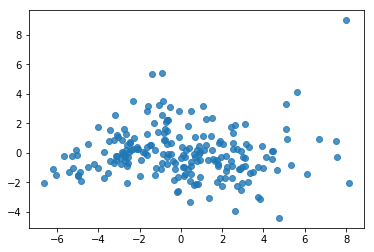

In [29]:
sns.regplot(x=db_decomp[:,0], y=db_decomp[:,1], fit_reg=False)

Distinct clusters are not really observable, however you could see a steady gradient from left to right, as well as one outlier. Here's a task to expand on - find the outlier!
Also the visualization gives us more questions than answers - I was slightly hoping that the chart will show me the right answer to the question of the number of clusters.

#### 2.2.3 Finally clustering.

When doing clustering the most important question is the number of clusters. Here again we have a number of options:
1. Choose an arbitrary split, based on a geographical *common sense* approach - 6 continents - say 2 economical regions per continent will yield 12 clusters. However this is more akin to eyeballing the solution and it may never converge.
2. Elbow method - which minimizes the WSS (within-cluster sum of squares, the measure of compactness).

In [30]:
# Determining the number of clusters - Elbow Method
from sklearn.cluster import KMeans

wss = []
max_clusters = 20

for i in range(1,max_clusters+1):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, random_state=42)
    model.fit(db_decomp)
    wss.append(model.inertia_)

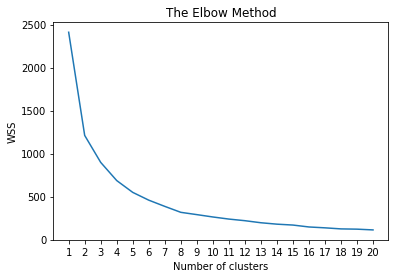

In [31]:
plt.plot(np.linspace(1,max_clusters,max_clusters), wss)
plt.title('The Elbow Method')
plt.xticks(np.linspace(1,max_clusters,max_clusters))
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

From the result, visualy, it seems that 8 clusters will suffice.

In [32]:
# Finally clustering the countries
final_model = KMeans(n_clusters = 8, init='k-means++', max_iter=300, random_state=42)
clusters = final_model.fit_predict(db_decomp)

In [33]:
cluster_countries_df = pd.DataFrame({'country_code':db_clean.index.values, 'cluster':clusters})
# creating the dict
country_cluster_map = {}
# i love my loops :)
for country in cluster_countries_df['country_code'].values:
    country_cluster_map[country] = cluster_countries_df[cluster_countries_df['country_code'] == country]['cluster'].values[0] 

In [94]:
# Assigning the cluster to the whole dataframe
db_df['Cluster'] = db_df['Country Code'].map(country_cluster_map)

#### 2.2.4 And finally filling out the missing values.

The working plan is to infer the values for each cluster by sampling from a (also an asumption) normal distribution for each year of the cluster.
This is going to be done via:
1. Determining the mean and variance for each cluster for each year for each indicator (if it measured).
2. Well... sampling from it.

But first - more clean up.

[/edit this part]
Quick write up:
1. Filter the original dataframe by indicators that have data in 2003
2. Do the inference only on them.
3. Correlate them with education indicators
[/edit this part]

**Assumption**: Indicators for a different clusters follow a normal distribution.

In [35]:
# Removing the countries that have not been assigned to a cluster
db_df = db_df[db_df['Cluster'].notnull()]

In [89]:
# Getting the list of indicators that start at 2003 - the earliest start year
indicator_list = indicator_db_year_df[indicator_db_year_df['Start_Year'] == 2003]['Indicator'].values

In [90]:
indicator_list

array(['IC.REG.COST.PC.ZS.WOMEN', 'IC.EC.COST', 'IC.REG.COST.PC.ZS',
       'IC.REG.CAP', 'IC.ISV.OTCM', 'IC.REG.PROC.WOMEN', 'IC.REG.PROC',
       'IC.ISV.COST', 'IC.ISV.RECRT', 'IC.LGL.DURS', 'IC.REG.DURS.WOMEN',
       'IC.REG.DURS', 'IC.ISV.DURS'], dtype=object)

In [101]:
def check_ind_cluster(df, ind_list):
    '''Verify whether cluster has all of the indicators at 2003 and if others have to be deleted. Return the list with non-complaint indicators'''
    non_compl_indicators = []
    for cluster in df['Cluster'].unique():
        for indicator in ind_list:
            # Check whether the cluster and indicator for 2003 are all nulls and append it to the list like a dict.
            if df[(df['Cluster'] == cluster) & (df['Indicator Code'] == indicator)]['2003'].isnull().values.all():
                non_compl_indicators.append({cluster: indicator})

In [103]:
non_cmpl_list = check_ind_cluster(db_df, indicator_list)
print(non_cmpl_list)

KeyError: 'Cluster'

Essentially an empty list. No more checks. Now forward to filtering our dataframe.

In [40]:
db_filtered_df = db_df[db_df['Indicator Code'].isin(indicator_list)]

Now lets create the function per indicator to get the mean and the variance of the cluster for the year per indicator.

In [41]:
years = db_filtered_df.columns[4:-1]

In [42]:
for year in years:
    if year == '2003':
        mean_cluster_indicator = db_filtered_df.groupby(['Cluster', 'Indicator Code'], as_index=False)[year].mean()
        var_cluster_indicator = db_filtered_df.groupby(['Cluster', 'Indicator Code'], as_index=False)[year].var()
    else:
        mean_cluster_indicator[year] = db_filtered_df.groupby(['Cluster', 'Indicator Code'], as_index=False)[year].mean()[year]
        var_cluster_indicator[year] = db_filtered_df.groupby(['Cluster', 'Indicator Code'], as_index=False)[year].var()[year]

In [43]:
mean_cluster_indicator.head()

,Cluster,Indicator Code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.0,IC.EC.COST,54.482353,51.315789,50.182609,49.550000,49.466667,49.466667,49.358333,49.304167,49.220833,47.808,43.524,43.524,43.524,43.524,43.524
1,0.0,IC.ISV.COST,27.321429,26.833333,26.294118,26.500000,26.421053,26.789474,26.789474,26.789474,26.789474,25.700,25.700,25.700,25.700,25.700,25.700
2,0.0,IC.ISV.DURS,3.392857,3.300000,3.323529,3.361111,3.289474,3.289474,3.289474,3.289474,3.289474,3.240,3.205,3.205,3.205,3.205,3.205
3,0.0,IC.ISV.OTCM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.0,IC.ISV.RECRT,9.470588,11.152632,9.860870,13.979167,14.983333,14.733333,14.733333,15.429167,16.154167,17.156,16.548,16.420,16.796,17.396,18.020


In [44]:
var_cluster_indicator.head()

,Cluster,Indicator Code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.0,IC.EC.COST,946.765294,933.885848,894.981502,865.673913,859.223188,859.223188,851.335580,847.603025,852.553025,866.932433,401.472733,401.472733,401.472733,401.472733,401.472733
1,0.0,IC.ISV.COST,301.407967,283.452381,257.845588,243.441176,230.035088,223.342105,223.342105,223.342105,223.342105,235.326316,235.326316,235.326316,235.326316,235.326316,235.326316
2,0.0,IC.ISV.DURS,1.477637,1.501429,1.599412,1.295458,1.320994,1.320994,1.320994,1.320994,1.320994,1.300421,1.334184,1.334184,1.334184,1.334184,1.334184
3,0.0,IC.ISV.OTCM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,IC.ISV.RECRT,102.025956,115.078187,124.794308,139.854764,132.357101,131.867536,131.867536,138.729982,154.822591,183.138400,167.686767,165.055000,174.077067,182.482067,190.350000


Now we have two matrices that contain the means of all the cluster-indicators for all of the years. Let's finally fill those missing values. To do this two things need to be done: 
1. Define a function to generate the random sample based on the cluster mean and variance.
2. Actually replacing them. I wasn't planning on another loop, but...

In [45]:
def random_cluster_sample(cluster_num, indicator, year, mean_cluster_ind, var_cluster_ind):
    dist_mean = mean_cluster_ind[(mean_cluster_ind['Cluster'] == cluster_num) & (mean_cluster_ind['Indicator Code'] == indicator)][year]
    dist_var = var_cluster_ind[(var_cluster_ind['Cluster'] == cluster_num) & (var_cluster_ind['Indicator Code'] == indicator)][year]
    
    return np.random.normal(dist_mean, np.sqrt(dist_var), 1)[0]  

In [46]:
def fill_missing_vals(df, mean_cluster_indicator, var_cluster_indicator):
    '''
        Takes as an input a dataframe and returns a clean one.
    '''
    df = df.copy()
    for index, row in df.iterrows():
        country_code = row['Country Code']
        indicator = row['Indicator Code']
        cluster = row['Cluster']
        year_list = list(row[row.isnull()].index)

        for year in year_list:
            df.loc[(df['Country Code'] == country_code) & (df['Indicator Code'] == indicator), year] = random_cluster_sample(cluster, indicator, year,
                                                                                                                             mean_cluster_indicator,
                                                                                                                             var_cluster_indicator)
    
    return df

In [47]:
db_dataset = fill_missing_vals(db_filtered_df, mean_cluster_indicator, var_cluster_indicator)

So now we have the *Doing Business* dataset with a reduced number of indicators, but all of them have data for the whole period. So what about the *Education* dataset? It was brushed off a while ago, where we tried to remove the indicators, based on a empty clusters. But now as the clusters are available, we can map them unto it and in general repeat the same process for finding the missing values. 

**Asummption**: The countries are clustered the same way in education, as they are in business.

In [48]:
# Mapping the clusters to the education dataset
edu_df['Cluster'] = edu_df['Country Code'].map(country_cluster_map)

# removing the countries without clusters. NB: The proper thing to do here is to actually check this countries and see why they don't have clusters
edu_df = edu_df[edu_df['Cluster'].notnull()]

# getting the list of indicators that start 2003
edu_indicators = list(indicator_edu_year_df[indicator_edu_year_df['Start_Year'] == 2003]['Indicator'])

# geting the list with the non-compliant 
non_compl_list = check_ind_cluster(edu_df, edu_indicators)

In [49]:
print(non_compl_list)

None


Again an empty list. Thus let's continue with the same steps - filtering and creating the mean-var matrices.

In [50]:
edu_filtered = edu_df[edu_df['Indicator Code'].isin(edu_indicators)]

In [51]:
years = edu_filtered.columns[4:-1]

for year in years:
    if year == '2003':
        edu_mean_cluster_indicator = edu_filtered.groupby(['Cluster', 'Indicator Code'], as_index=False)[year].mean()
        edu_var_cluster_indicator = edu_filtered.groupby(['Cluster', 'Indicator Code'], as_index=False)[year].var()
    else:
        edu_mean_cluster_indicator[year] = edu_filtered.groupby(['Cluster', 'Indicator Code'], as_index=False)[year].mean()[year]
        edu_var_cluster_indicator[year] = edu_filtered.groupby(['Cluster', 'Indicator Code'], as_index=False)[year].var()[year]

In [52]:
edu_mean_cluster_indicator.head()

,Cluster,Indicator Code,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0.0,HH.DHS.GAR.456,1.116442,3.754989,2.848159,1.952721,2.047845,2.6,NaN,2.752631,8.900000,5.416667,6.195529,6.401001,6.238783,NaN,NaN
1,0.0,HH.DHS.GAR.456.F,0.893847,3.080128,1.721381,1.090256,1.429105,2.2,NaN,1.978417,7.800000,4.500000,5.017515,5.403566,5.024975,NaN,NaN
2,0.0,HH.DHS.GAR.456.M,1.398364,4.523657,4.165084,3.270629,2.878495,3.2,NaN,3.809662,10.100000,6.666667,7.506981,7.578769,7.589906,NaN,NaN
3,0.0,HH.DHS.GAR.456.Q1,0.000000,0.000000,0.045282,0.000000,0.000000,0.0,NaN,0.084143,0.000000,0.263880,0.126978,0.328643,0.126978,NaN,NaN
4,0.0,HH.DHS.GAR.456.Q2,0.076164,0.000000,0.034460,0.094523,0.425933,0.0,NaN,0.172491,0.193622,1.141971,0.166314,1.662353,0.166314,NaN,NaN


Just looking at the head it looks that there are a lot of missing values for the mean. However I believe data is better perceived visually.

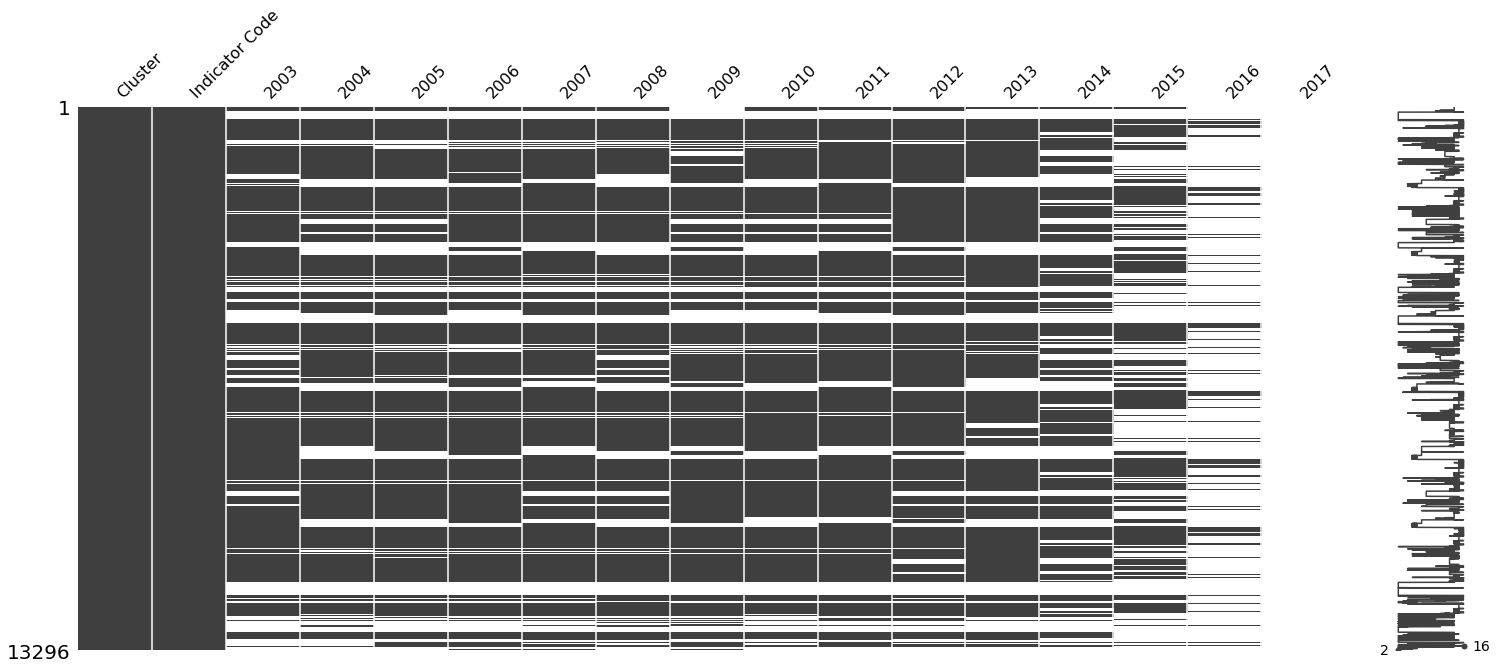

In [53]:
import missingno as msno
msno.matrix(edu_mean_cluster_indicator)

That's a lot of missing means. Also it appears that the values for *2017* are completely missing. Looking at it, the way forward is to go back to the original question, and let me phrase it in a different way, *is there a correlation between doing business and the availabiliy of skilled worksers*.

The *doing business* has all of the data points, however my educated guess is that the *education* one doesn't. So how can we proceed from here?
1. From the list of indicators (and there are a lot) filter it by the relevant ones - most likely upto 10. 
2. Filter the dataset further for the countries I am interested in.
3. Look at the missing data there and figure out how to replace it.
4. See the correlation between both - education and doing business.

The [World Bank](datacatalog.worldbank.org) is kind enough to provide an additional csv file with the description of each indicator for both datasets. I'm going to add it to repo for the sake of information availability, but I will chose the indicators.

A quick look at the indicators show that data is collected for age groups, that are above or below the required legal age for work.  
**Assumption**: The legal age for working is 18, and the age for retirement is 65(although it differs for man and women).

In addition the indicator has to have information about the percentage of the population that completed school of some kind. Looking at the Barro-Lee indicators it seems they group people based on primary, secondary and tertiary school.

In [54]:
edu_desc = pd.read_csv('./1_DC_Python_Data/EdStatsSeries.csv')
age_grp_primary = 'with primary schooling. Completed Primary'
age_grp_secondary = 'secondary schooling. Completed Secondary'
age_grp_tertiary = 'tertiary schooling. Completed Tertiary'

edu_cmp_ed = edu_desc[edu_desc['Indicator Name'].str.contains(age_grp_primary) | 
         edu_desc['Indicator Name'].str.contains(age_grp_secondary) | 
         edu_desc['Indicator Name'].str.contains(age_grp_tertiary)]

In [55]:
# For the age groups - The assumptions is that data for ages below 18 and above 65 will be discarded.
# Discard the ones that have no age group
edu_cmp_ed_with_grps = edu_cmp_ed[edu_cmp_ed['Indicator Name'].str.extract('(\d{2}-\d{2})').notnull()]
edu_cmp_ed_with_grps['Age Group'] = edu_cmp_ed_with_grps['Indicator Name'].str.extract('(\d{2}-\d{2})')

# Finally drop the age groups that are below our threshold or above it
suitable_age_grps = edu_cmp_ed_with_grps['Age Group'].unique()[1:-2]
edu_cmp_ed_final = edu_cmp_ed_with_grps[edu_cmp_ed_with_grps['Age Group'].isin(suitable_age_grps)]

# We can drop all columns except 'Series Code' and 'Age Group'
edu_cmp_ed_final = edu_cmp_ed_final.drop(edu_cmp_ed_final.columns[1:-1], axis=1)
indicator_list_edu = edu_cmp_ed_final['Series Code'].values

So now we have the indicator list. Now the countries:

In [56]:
balkan_country_list = ['BGR', 'BIH', 'SRB', 'HRV', 'GRC', 'MNE','SVN', 'ALB', 'MKD', 'XKX']
# If I missed a country, excuse me, it was not intentional. Any order as well.
balkan_edu_df = edu_df[edu_df['Country Code'].isin(balkan_country_list)]
balkan_db_df = db_dataset[db_dataset['Country Code'].isin(balkan_country_list)]

In [57]:
balkan_edu_df = balkan_edu_df[balkan_edu_df['Indicator Code'].isin(indicator_list_edu)]

Let's plot the missing values as before.

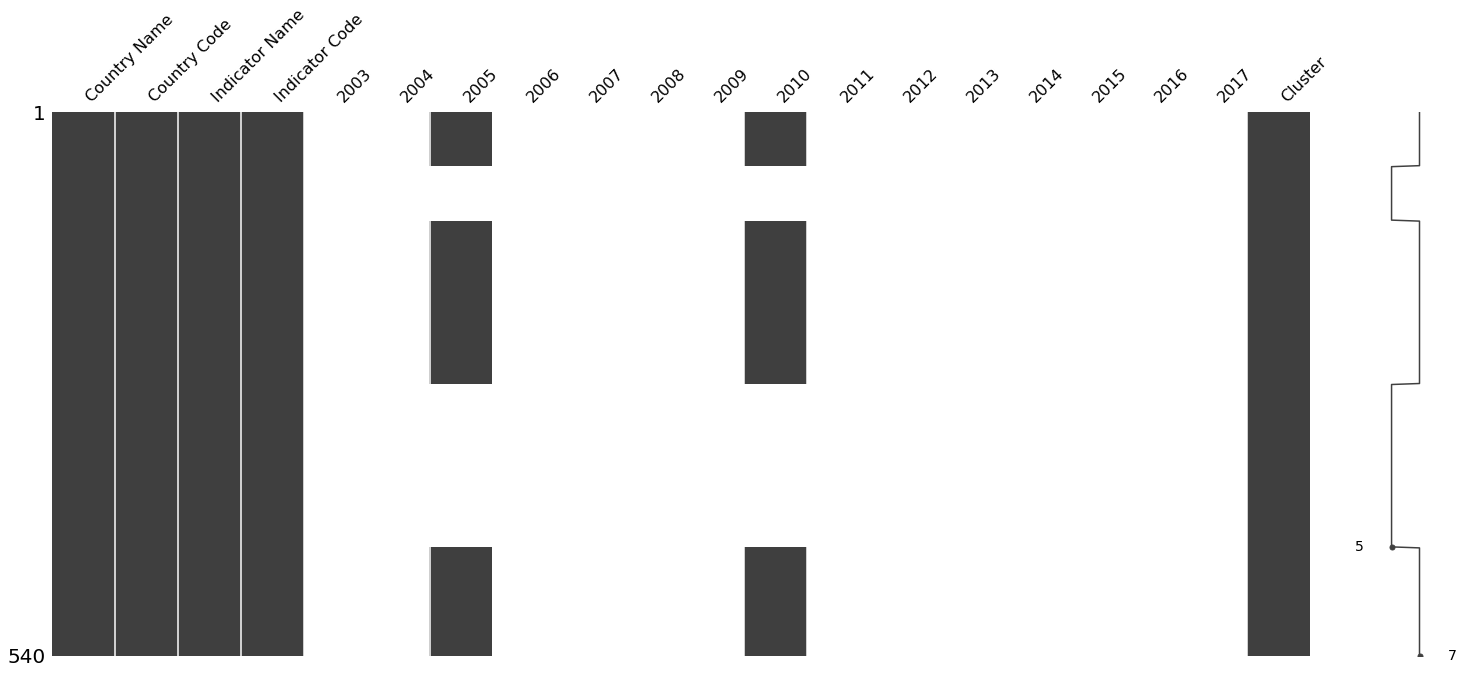

In [58]:
msno.matrix(balkan_edu_df)

It seems that the values are periodic - one sample in 2005 and one sample in 2010. Also there fields that are completely missing.
First lets determine which indicators are missing.

In [59]:
missing_indicators_list = balkan_edu_df[balkan_edu_df['2005'].isnull()]['Indicator Code'].unique()
# check how much are missing from the original list
if sorted(missing_indicators_list) == sorted(indicator_list_edu):
    print("Whole countries are missing. List below.")
    print(balkan_edu_df[balkan_edu_df['2005'].isnull()]['Country Code'].unique())
else: 
    print(mssing_indicator_list)

Whole countries are missing. List below.
['BIH' 'XKX' 'MKD' 'MNE']


Unfortunatelly whole countries are missing from the data. We are not going to use them for now.

In [60]:
balkan_edu_df = balkan_edu_df[~balkan_edu_df['Country Code'].isin(['BIH','XKX','MKD','MNE'])]

On the other hand there appears to be data only for two years - 2005 and 2010. Is that the case throughout the whole dataset though?

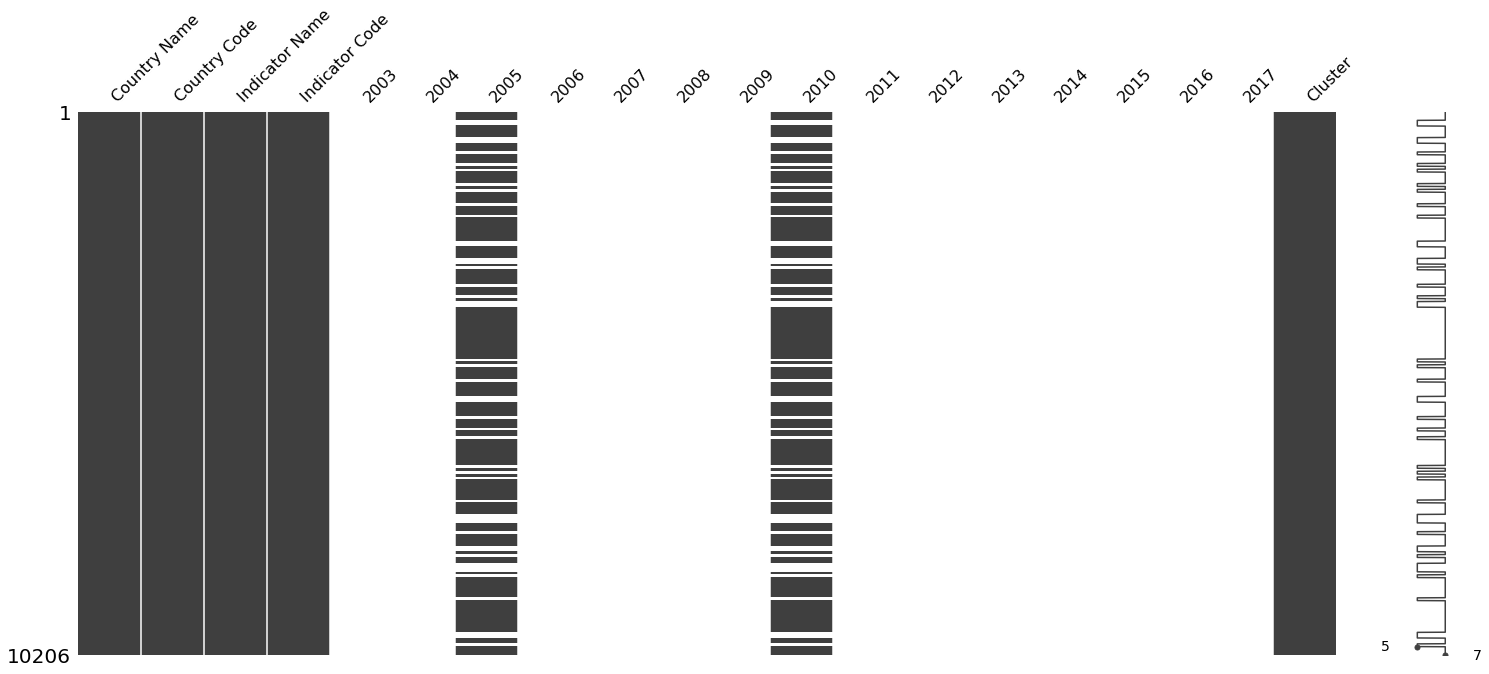

In [61]:
msno.matrix(edu_df[(edu_df['Indicator Code'].isin(indicator_list_edu))])

It seems that is the case though. Here we have two options:
1. Choose a replacement indicators, that have more data. However there may not be enough data to make the search worthwhile. 
2. Interpolate the missing data. This however means that all variation of the data is lost and we simply assume a linear progression of the indicator. Also this linearity can be justified only for the period 2005 to 2010 - anything after that is along the lines of guesswork. That is why we would truncate the *Doing Business* dataset to the period 2005-2010.

In [62]:
# Filter the db dataset
db_columns_to_delete = np.concatenate((db_dataset.columns.values[4:6],db_dataset.columns.values[12:-1]))
db_df = db_dataset.drop(db_columns_to_delete, axis=1)
# filtering the countries
balkan_db_df = db_df[db_df['Country Code'].isin(balkan_country_list)]
balkan_db_df = balkan_db_df[~balkan_db_df['Country Code'].isin(['BIH','XKX','MKD','MNE'])]
# filter the edu dataset & interpolating
edu_columns_to_delete = np.concatenate((balkan_edu_df.columns.values[4:6],balkan_edu_df.columns.values[12:-1]))
balkan_edu1_df = balkan_edu_df.drop(edu_columns_to_delete, axis=1)
balkan_edu1_df[balkan_edu1_df.columns.values[4:-1]] = balkan_edu1_df[balkan_edu1_df.columns.values[4:-1]].interpolate(method='linear', axis=1)

Finally we have data that we can work with, free of missing values.

## 3. Finding the correlations.

In [113]:
# Generating a joint matrix
balkan_df = pd.concat([balkan_edu1_df, balkan_db_df])

#### 3.1. For the whole balkan area

In [138]:
jbalkan = balkan_df.groupby(['Indicator Code'])['2005', '2006','2007','2008','2009','2010'].mean().transpose().corr()

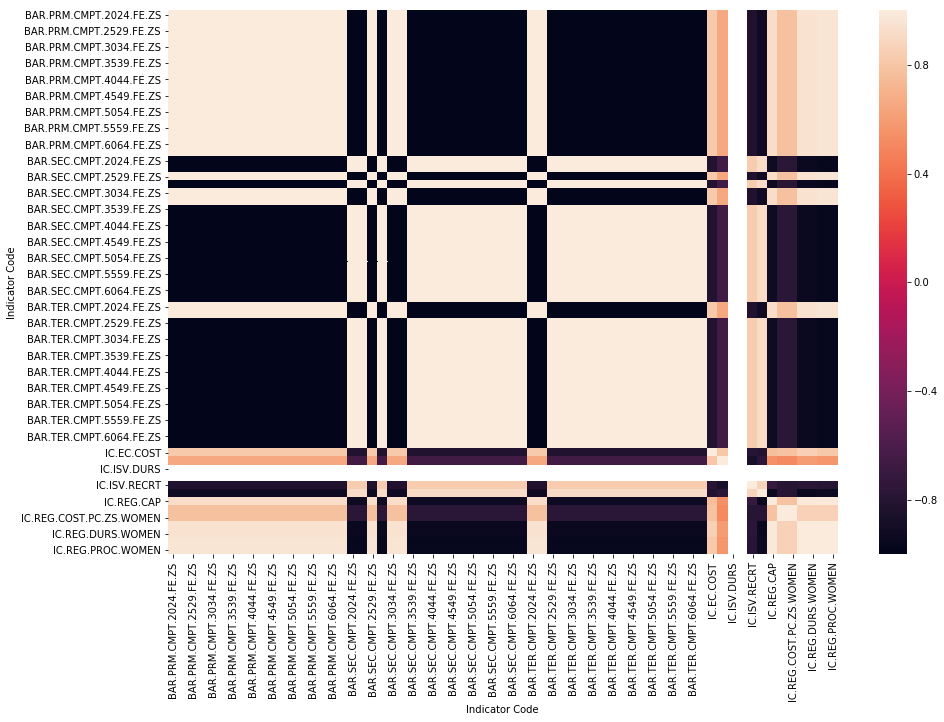

In [142]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(jbalkan, ax=ax)

The goal was to show whether there is any correlation between the `Doing Business` and `Education` datasets. It can be clearly seen (upper right corner) there is clearly a positive correlation between indicators from the `Doing Business` dataset and the one from `Education`. Although work is never really done and I would have liked to explore each country individually, and maybe bring some reasoning to the whole plot I will do that at a later date.